In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")

**Для начала загрузим файл в pd.DataFrame**

In [2]:
data = pd.read_csv("2020_rankings.csv")
print(data)

      rank_order   rank                                   name scores_overall  \
0             10      1                   University of Oxford           95.4   
1             20      2     California Institute of Technology           94.5   
2             30      3                University of Cambridge           94.4   
3             40      4                    Stanford University           94.3   
4             50      5  Massachusetts Institute of Technology           93.6   
...          ...    ...                                    ...            ...   
1392       13930  1001+                     Yuan Ze University      10.7–22.1   
1393       13940  1001+                     Zagazig University      10.7–22.1   
1394       13950  1001+                   University of Zagreb      10.7–22.1   
1395       13960  1001+                   University of Zanjan      10.7–22.1   
1396       13970  1001+      Zhejiang University of Technology      10.7–22.1   

      scores_overall_rank  

Можно предположить, что столбцы 'aliases' и 'subject_offered' будут наименее эффектинвы для дальнейшего исследования. Название 'aliases' практически всегда совпадает с основым названием ВУЗа, а список предметов будет трудно проанализировать. 

In [6]:
# Заменяем запятую на пустую строку
data['stats_number_students'] = data['stats_number_students'].str.replace(',', '')
data['stats_number_students'] = data['stats_number_students'].astype('int64')

**Проанализируем столбцы и их типы данных**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397 entries, 0 to 1396
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank_order                         1397 non-null   int64  
 1   rank                               1397 non-null   object 
 2   name                               1397 non-null   object 
 3   scores_overall                     1397 non-null   object 
 4   scores_overall_rank                1397 non-null   int64  
 5   scores_teaching                    1397 non-null   float64
 6   scores_teaching_rank               1397 non-null   int64  
 7   scores_research                    1397 non-null   float64
 8   scores_research_rank               1397 non-null   int64  
 9   scores_citations                   1397 non-null   float64
 10  scores_citations_rank              1397 non-null   int64  
 11  scores_industry_income             1397 non-null   float

Таблица состоит из 24 столбца с данными со следующими datatype: 'int64', 'object', 'float64', 'bool'. В каждом столбце имеется 1397 значений кроме 'stats_female_male_ratio', где в 66 строках имеются пропуски. Прежде чем перейти к проверке данного суждения, заметим, что последние два столбца состоят из переменной 'bool', проверим, если все значения одинковы и равны 'False', то в дальнейшем анализе эти столбцы не понадобятся.

In [8]:
data['closed'].isin([True]).any()

False

In [9]:
data['unaccredited'].isin([True]).any()

False

Обе функции вернули значение 'false' => можно сделать вывод, что столбцы 'closed' и 'unaccredited' также не несут в себе смысла, так как для всех ВУЗов значения одникаовые: они работают и аккредитированы. 

**Проверим количество пропусков в каждой колонке**

In [10]:
data.isnull().sum()

rank_order                            0
rank                                  0
name                                  0
scores_overall                        0
scores_overall_rank                   0
scores_teaching                       0
scores_teaching_rank                  0
scores_research                       0
scores_research_rank                  0
scores_citations                      0
scores_citations_rank                 0
scores_industry_income                0
scores_industry_income_rank           0
scores_international_outlook          0
scores_international_outlook_rank     0
location                              0
stats_number_students                 0
stats_student_staff_ratio             0
stats_pc_intl_students                0
stats_female_male_ratio              66
aliases                               0
subjects_offered                      0
closed                                0
unaccredited                          0
dtype: int64

Предположение подвтердилось, что в столбце 'stats_female_male_ratio' 66 пропуска, так как значения данного столбца представляют собой пропурцию двух чисел (процентное соотношение девушек к мужчинам), просто заполнить медианой пропуски не получится (тип переменной - object). Попробуем оставить в этом столбце лишь первые два символа, то есть число процентов учащихся девушек в каждом ВУЗе. Заменим столбез с данными 'stats_female_male_ratio' на 'stats_female_ratio'.

In [11]:
data['stats_female_male_ratio'] = data['stats_female_male_ratio'].str[:2]
data = data.rename(columns={'stats_female_male_ratio': 'stats_female_ratio'})

data.head()

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,...,scores_international_outlook_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_ratio,aliases,subjects_offered,closed,unaccredited
0,10,1,University of Oxford,95.4,10,90.5,6,99.6,1,98.4,...,22,United Kingdom,20665,11.2,41%,46,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False
1,20,2,California Institute of Technology,94.5,20,92.1,2,97.2,4,97.9,...,151,United States,2240,6.4,30%,34,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False
2,30,3,University of Cambridge,94.4,30,91.4,4,98.7,2,95.8,...,37,United Kingdom,18980,10.9,37%,47,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False
3,40,4,Stanford University,94.3,40,92.8,1,96.4,5,99.9,...,188,United States,16135,7.3,23%,43,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False
4,50,5,Massachusetts Institute of Technology,93.6,50,90.5,5,92.4,10,99.5,...,99,United States,11247,8.6,34%,39,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False


Теперь заполним пропуски медианой, так как это среднее по численности в упорядочном списке, а не просто среднее арифметическое, что может исказить данные.

In [12]:
data.fillna(data.median(), inplace=True)

In [13]:
data.isnull().sum()
#Ещё одна проверка показала, что мы избавились от нулевых значений.

rank_order                           0
rank                                 0
name                                 0
scores_overall                       0
scores_overall_rank                  0
scores_teaching                      0
scores_teaching_rank                 0
scores_research                      0
scores_research_rank                 0
scores_citations                     0
scores_citations_rank                0
scores_industry_income               0
scores_industry_income_rank          0
scores_international_outlook         0
scores_international_outlook_rank    0
location                             0
stats_number_students                0
stats_student_staff_ratio            0
stats_pc_intl_students               0
stats_female_ratio                   0
aliases                              0
subjects_offered                     0
closed                               0
unaccredited                         0
dtype: int64

Теперь определим, какие столбцы будут присутсвовать в дальнейшем исследовании.

In [14]:
useful_cols = ['rank_order', 'rank', 'name', 'scores_overall', 'scores_teaching', 'scores_research', 'scores_citations', 'scores_industry_income', 'scores_international_outlook', 'location', 'stats_number_students', 'stats_female_ratio']
data[useful_cols]

,rank_order,rank,name,scores_overall,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,location,stats_number_students,stats_female_ratio
0,10,1,University of Oxford,95.4,90.5,99.6,98.4,65.5,96.4,United Kingdom,20665,46
1,20,2,California Institute of Technology,94.5,92.1,97.2,97.9,88.0,82.5,United States,2240,34
2,30,3,University of Cambridge,94.4,91.4,98.7,95.8,59.3,95.0,United Kingdom,18980,47
3,40,4,Stanford University,94.3,92.8,96.4,99.9,66.2,79.5,United States,16135,43
4,50,5,Massachusetts Institute of Technology,93.6,90.5,92.4,99.5,86.9,89.0,United States,11247,39
...,...,...,...,...,...,...,...,...,...,...,...,...
1392,13930,1001+,Yuan Ze University,10.7–22.1,17.3,13.9,15.5,47.0,28.3,Taiwan,8356,42
1393,13940,1001+,Zagazig University,10.7–22.1,13.6,7.7,29.6,34.4,38.8,Egypt,156419,53
1394,13950,1001+,University of Zagreb,10.7–22.1,17.8,12.9,25.3,37.4,33.0,Croatia,68216,59
1395,13960,1001+,University of Zanjan,10.7–22.1,17.0,12.3,28.5,43.8,18.7,Iran,9980,54


Проверим ВУЗы какой страны чаще всего встречаются в этом рейтинге. 

In [15]:
#Код найден с помощью ИИ, запрос был следующим:Как в Python найти какое значение в столбце чаще всего встречается?

value_counts = data['location'].value_counts()
most_common_value = value_counts.index[0]
print(most_common_value)

United States


Теперь изучим, какое минимальное и максимальное показателя дохода отрасли по инновации.

In [16]:
# Максимальное значение в столбце
print(data['scores_industry_income'].max())

# Минимальное значение в столбце
print(data['scores_industry_income'].min())

100.0
34.4


# Визуализация

In [17]:
print("Максимальное значение:", data['scores_international_outlook'].max())
print("Минимальное значение:", data['scores_international_outlook'].min())
print("Среднее:", data['scores_international_outlook'].mean())
print("Медиана:", data['scores_international_outlook'].median())

Максимальное значение: 99.7
Минимальное значение: 13.1
Среднее: 47.09892627057979
Медиана: 43.1


Text(0.5, 1.0, 'Гистограмма, построенная по показателю scores_international_outlook')

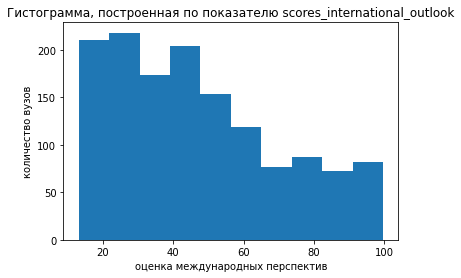

In [18]:
plt.hist(data['scores_international_outlook'])
plt.xlabel('оценка международных перспектив')
plt.ylabel('количество вузов')
plt.title('Гистограмма, построенная по показателю scores_international_outlook')

На графике видно, что чаще всего оценка международных перспектив у высших заведений ниже среднего, это подтверждает и поиск медианы чуть выше.

In [19]:
data['stats_female_ratio'] = data['stats_female_ratio'].astype('float64')

print(data.dtypes)

#Код найден с помощью ИИ, запрс: Как изменить тип данных object на float64

rank_order                             int64
rank                                  object
name                                  object
scores_overall                        object
scores_overall_rank                    int64
scores_teaching                      float64
scores_teaching_rank                   int64
scores_research                      float64
scores_research_rank                   int64
scores_citations                     float64
scores_citations_rank                  int64
scores_industry_income               float64
scores_industry_income_rank            int64
scores_international_outlook         float64
scores_international_outlook_rank      int64
location                              object
stats_number_students                  int64
stats_student_staff_ratio            float64
stats_pc_intl_students                object
stats_female_ratio                   float64
aliases                               object
subjects_offered                      object
closed    

Text(0.5, 1.0, 'Гистограмма')

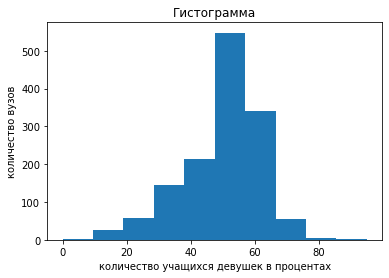

In [20]:
plt.hist(data['stats_female_ratio'])
plt.xlabel('количество учащихся девушек в процентах')
plt.ylabel('количество вузов')
plt.title('Гистограмма')

График выше иллюстрирует, что в основном количество девушек равняется или превышает количество учащихся парней. 

Text(0.5, 1.0, 'Гистограмма')

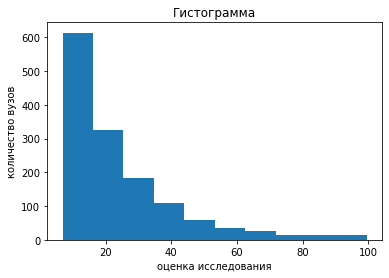

In [21]:
plt.hist(data['scores_research'])
plt.xlabel('оценка исследования')
plt.ylabel('количество вузов')
plt.title('Гистограмма')

Text(0.5, 1.0, 'Гистограмма')

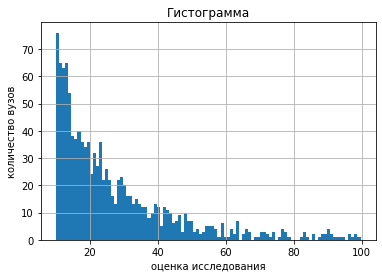

In [22]:
data[data.scores_research > 10].scores_research.hist(bins=100)
plt.xlabel('оценка исследования')
plt.ylabel('количество вузов')
plt.title('Гистограмма')

На сайте приведено следующее объяснение данной переменной 'scores_research': объем, индекс и репутация университета. На графике как раз видно, что подавлящее большинство университетов имеют низкую оценку (ниже 50) => можно сделать вывод, что высокая оценка исследования свойственна топовым университетам.

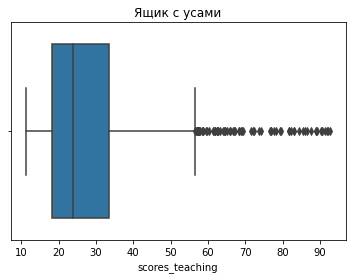

In [30]:
import seaborn as sns

ax = sns.boxplot(x=data['scores_teaching'])
ax.set(title='Ящик с усами')

# отображение графика
plt.show()

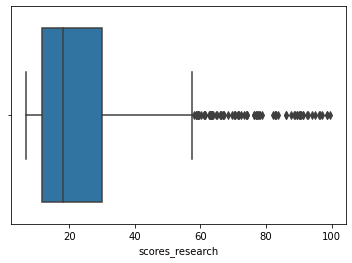

In [29]:
sns.boxplot(x=data['scores_research'])

# отображение графика
plt.show()

Два предыдущих графика показывают наличие выбросов по двум переменным ('scores_research' и 'scores_teaching'), но мне кажется, что значения, которые попали в выбросы, важны для дальнейшего анализы, ведь мы иследуем все ВУЗы, которые встречаются в рейтинге, и не игнорируем те, у которых встречаются высокие показатели.

# Создание нового признака

In [23]:
value_counts = data['location'].value_counts()
for index, value in value_counts.items():
    print(f"{index}: {value}")

United States: 172
Japan: 110
United Kingdom: 100
China: 81
India: 56
Germany: 48
Brazil: 46
Spain: 45
Italy: 45
Iran: 40
Russian Federation: 39
France: 38
Taiwan: 36
Australia: 35
Turkey: 34
South Korea: 31
Canada: 30
Egypt: 20
Chile: 18
Czech Republic: 17
Mexico: 17
Thailand: 16
Poland: 14
Pakistan: 14
Malaysia: 13
Portugal: 13
Netherlands: 13
Sweden: 12
Austria: 11
Switzerland: 11
Greece: 10
South Africa: 10
Finland: 9
Ireland: 9
Romania: 9
Algeria: 8
Colombia: 8
Hungary: 8
New Zealand: 8
Belgium: 8
Saudi Arabia: 7
Denmark: 7
Ukraine: 6
Tunisia: 6
Indonesia: 6
Hong Kong: 6
Israel: 6
Morocco: 5
Jordan: 5
Norway: 5
Slovakia: 4
Argentina: 4
Nigeria: 4
United Arab Emirates: 4
Lithuania: 3
Latvia: 3
Vietnam: 3
Lebanon: 3
Estonia: 3
Croatia: 2
Venezuela: 2
Macao: 2
Cyprus: 2
Peru: 2
Iraq: 2
Iceland: 2
Kazakhstan: 2
Slovenia: 2
Sri Lanka: 2
Philippines: 2
Singapore: 2
Cuba: 1
Georgia: 1
Bangladesh: 1
Tanzania: 1
Montenegro: 1
Luxembourg: 1
Belarus: 1
Bulgaria: 1
Qatar: 1
Kuwait: 1
Oman: 1


In [24]:
# создаем новый столбец, в котором будут только те страны, которые упоминаются более 20 раз
data['Страна_более_20_раз'] = data['location'].apply(lambda x: x if value_counts[x] > 20 else '')

*Два предыдущих кода были найдены с помощью чата GPT, были следующие запросы:* 
- Как вывести все значения одного столбца таблицы, но чтобы они не повторялись и рядом с каждым написать, сколько раз оно встречалось?
- Создать новый столбец, где будут встречаться лишь те страны, которые упоминаются в предыдущем столбце более 20 раз

In [25]:
print(np.unique(data['Страна_более_20_раз']))

['' 'Australia' 'Brazil' 'Canada' 'China' 'France' 'Germany' 'India'
 'Iran' 'Italy' 'Japan' 'Russian Federation' 'South Korea' 'Spain'
 'Taiwan' 'Turkey' 'United Kingdom' 'United States']


Далее я хочу создать столбец, который позволит анализировать более широкие области. Можно распределить страны в зависимости от континента или материка, но в таком случае объединяться Южная и Северная Америка или Европа и Азия, а я предполагаю, что данные, например, по Северной Америке будут сильно отличаться от Южной, то же касается Европы и Азии. <br> <br> Я разделю страны на следующие регионы: Европа (Франция, Германия, Италия, Россия, Испания, Великобритания), Азия (Китай, Иран, Индия, Япония, Южная Корея, Тайвань, Турция), Северная Америка (США, Канада), Южная Америка (Бразилия), Австралия. <br> <br> Территория Турции и РФ находятся сразу в двух частях света, однако лишь 2% Турции находится в Европе, поэтому её смело можно отнести к Азии, а учебная система в России больше пока что больше похожа на европейскую, а не на азатскую, поэтому также отношу нашу страну к Европе. <br> <br> Также я посчитала, что нет смысла добавлять страны в новый столбец, которые встречались менее 20 раз. Отсюда как раз можно сделать вывод, что африканские ВУЗы редко встречаются в данном рейтинге.

In [26]:
continent_dict = {
    'Australia': 'Австралия',
    'Brazil': 'Южная Америка',
    'Canada': 'Северная Америка',
    'China': 'Азия',
    'France': 'Европа',
    'Germany': 'Европа',
    'India': 'Азия',
    'Iran': 'Азия',
    'Italy': 'Европа',
    'Japan': 'Азия',
    'Russian Federation': 'Европа',
    'South Korea': 'Азия',
    'Spain': 'Европа',
    'Taiwan': 'Азия',
    'Turkey': 'Азия',
    'United Kingdom': 'Европа',
    'United States': 'Северная Америка',
}

data['Большие регионы'] = data['location'].apply(lambda x: continent_dict.get(x, 'Неизвестно'))

*Данный код был найден с помощью чата, запрос следующий: У нас есть столбец таблицы с названием стран, сами страны могут повторяться. Нужно создать новый столбец, где вместо названия страны будет написан континент, где он располагается. Для создания этого столбца должна быть функция, где я буду перебирать каждую страну и рядом с ней писать название континента.*


In [27]:
#Ещё раз перечислим данные, которые пригодятся в дальнейшем.
useful_cols = ['rank_order', 'rank', 'name', 'scores_overall', 'scores_teaching', 'scores_research', 'scores_citations', 'scores_industry_income', 'scores_international_outlook', 'location', 'stats_number_students', 'stats_female_ratio', 'Большие регионы']
data[useful_cols]

,rank_order,rank,name,scores_overall,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,location,stats_number_students,stats_female_ratio,Большие регионы
0,10,1,University of Oxford,95.4,90.5,99.6,98.4,65.5,96.4,United Kingdom,20665,46.0,Европа
1,20,2,California Institute of Technology,94.5,92.1,97.2,97.9,88.0,82.5,United States,2240,34.0,Северная Америка
2,30,3,University of Cambridge,94.4,91.4,98.7,95.8,59.3,95.0,United Kingdom,18980,47.0,Европа
3,40,4,Stanford University,94.3,92.8,96.4,99.9,66.2,79.5,United States,16135,43.0,Северная Америка
4,50,5,Massachusetts Institute of Technology,93.6,90.5,92.4,99.5,86.9,89.0,United States,11247,39.0,Северная Америка
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392,13930,1001+,Yuan Ze University,10.7–22.1,17.3,13.9,15.5,47.0,28.3,Taiwan,8356,42.0,Азия
1393,13940,1001+,Zagazig University,10.7–22.1,13.6,7.7,29.6,34.4,38.8,Egypt,156419,53.0,Неизвестно
1394,13950,1001+,University of Zagreb,10.7–22.1,17.8,12.9,25.3,37.4,33.0,Croatia,68216,59.0,Неизвестно
1395,13960,1001+,University of Zanjan,10.7–22.1,17.0,12.3,28.5,43.8,18.7,Iran,9980,54.0,Азия


# Гипотезы

**Предварительные гипотезы, которые будут проверяться в дальнейшем:**
1) Проверить гипотезу, что количество учащихся девушек никак не влияет на место в рейтинге.
<br> 2) Проверить гипотезу, что оценка международных перспектив никак не влияет на место в рейтинге. <br> 3) Проверить гипотезу, чем выше 'scores_research', тем выше место университета в рейтинге.

***Гипотеза 1*** <br> **Количество учащихся девушек никак не влияет на место университета в рейтинге.**

Для данной задачи нулевая гипотеза ($H_0$) будет состоять в том, что количество учащихся девушек не имеет статистически значимого влияния на место университета в рейтинге. Альтернативная гипотеза ($H_1$) будет состоять в том, что количество учащихся девушек имеет статистически значимое влияние на место в рейтинге.

In [31]:
# функция для расчета статистики
def test_statistic(data):
    return np.corrcoef(data["rank_order"], data["stats_female_ratio"])[0, 1]

# расчет истинной статистики
true_stat = test_statistic(data)

# генерация бутстрепированных выборок
n_samples = 1000
statistics = []
for i in range(n_samples):
    sample = data.sample(frac=1, replace=True)
    stat = test_statistic(sample)
    statistics.append(stat)

# расчет p-value
p_value = (np.sum(np.abs(statistics) >= np.abs(true_stat)) + 1) / (n_samples + 1)

# вывод результатов
print("True statistic:", true_stat)
print("p-value:", p_value)

# оценить результаты
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу в пользу альтернативной")
else:
    print("Нулевая гипотеза не отвергается")

True statistic: -0.09581063841995871
p-value: 0.4885114885114885
Нулевая гипотеза не отвергается


На уровне значимости 5% p-value оказалось больше => нет оснований отвергать нулевую гипотезу, а значит, количество учащихся девушек не влияет на место университета в рейтинге.

***Гипотеза 2***
<br>**Чем выше 'scores_research', тем выше место университета в рейтинге.**
<br>*Не знаю, насколько правильно я интерпретировала, но получается, что исходя из гипотезы, чем выше 'scores_research', тем значение 'rank_order' должно быть меньше (так как чем меньше 'rank_order', тем выше место универа в рейтинге. Scores_research - объем, индекс и репутация университета. Rank_order - место ВУЗа в рейтинге.*

In [32]:
import pandas as pd
from scipy.stats import pearsonr, ttest_ind

# рассчитать коэффициент корреляции Пирсона между rank_order и scores_research:
corr, _ = pearsonr(data['rank_order'], data['scores_research'])
print('Коэффициент корреляции Пирсона: %.3f' % corr)

Коэффициент корреляции Пирсона: -0.770


Отрицательный коэффициент корреляции показывает на отрицательную зависимость между двумя переменными, то есть увеличение одной переменной ведёт к уменьшению второй => увеличивается значение переменной 'scores_research', уменьшается значение переменной 'rank_order', а значит, тем выше место университета в рейтинге.

Проверим теперь с помощью линейной регерессии.

In [33]:
import pandas as pd
from scipy import stats

# загрузка и подготовка данных
x = data['scores_research']
y = data['rank_order']

# проведение линейной регрессии и получение результатов
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# вывод коэффициента наклона и p-значения
print("Коэффициент наклона: ", slope)
print("p-значение: ", p_value)

# проверка статистической значимости коэффициента наклона
if p_value < 0.05:
    print("Нулевая гипотеза отвергнута, есть статистически значимая обратная связь между 'scores_research' и 'rank_order'.")
else:
    print("Нулевая гипотеза не отвергнута, нет достаточных доказательств статистически значимой обратной связи между scores_research и rank_order.")

Коэффициент наклона:  -177.15318687434458
p-значение:  1.5248757461160475e-274
Нулевая гипотеза отвергнута, есть статистически значимая обратная связь между 'scores_research' и 'rank_order'.


In [34]:
import statsmodels.api as sm

# добавление константы для модели линейной регрессии
X = sm.add_constant(data['scores_research'])

# создание модели линейной регрессии
model = sm.OLS(data['rank_order'], X)

# обучение модели
results = model.fit()

# проверка статистической значимости коэффициента наклона
alpha = 0.05
if results.pvalues[1] < alpha:
    print("Нулевая гипотеза отвергнута, есть статистически значимая обратная связь между 'scores_research' и 'rank_order'.")
else:
    print("Нулевая гипотеза не отвергнута, нет достаточных доказательств статистически значимой обратной связи между scores_research и rank_order.")

Нулевая гипотеза отвергнута, есть статистически значимая обратная связь между 'scores_research' и 'rank_order'.


Два кода выше - это рвзные ответы двух чатов GPT на один и тот же вопрос: Проверить гипотезу, чем выше 'scores_research', тем меньше значение 'rank_order'. Проверить с помощью линейной регрессии.

Первый код от https://you.com/search?q=who+are+you&tbm=youchat&cfr=chat
<br>Второй от бота в ТГ @gpt3_unlim_chatbot

In [35]:
threshold = data['scores_research'].median()

# разделение университетов на две группы на основе значения scores_research
high_scores = data[data['scores_research'] >= threshold]
low_scores = data[data['scores_research'] < threshold]

# проведение t-теста
t_stat, p_value1 = ttest_ind(high_scores['rank_order'], low_scores['rank_order'], equal_var=False)

# вывод p-значения
print("p-значение:", p_value1)

# оценить результаты
if p_value1 < 0.05:
    print("Отвергаем нулевую гипотезу в пользу альтернативной")
else:
    print("Нулевая гипотеза не отвергается")

p-значение: 4.473543642082631e-233
Отвергаем нулевую гипотезу в пользу альтернативной


В этом контексте, чтобы проверить гипотезу на основе t-теста, нужно разделить университеты на две группы: те, у которых значения scores_research выше или равны пороговому значению, и те, у которых значения scores_research ниже порогового значения. Затем рассчитывается t-статистика и соответствующее p-значение. Пороговое значение принято за медиану переменной 'scores_research'.

В данном случае p-значение почти приближено к нулю, что означает, что разница между средними значениями групп с высокими и низкими значениями scores_research является статистически значимой на уровне значимости 0,05 или даже меньше. В данном случае может быть отвергнута нулевая гипотеза в пользу альтернативной гипотезы о том, что значения места в рейтинге различаются в зависимости от значений 'scores_research'.

Данный код был сгенирирован чатом, изначальный запрос был такой: 
- Имеется следующая таблица со столбцами: 
useful_cols = ['rank_order', 'rank', 'name', 'scores_overall', 'scores_teaching', 'scores_research', 'scores_citations', 'scores_industry_income', 'scores_international_outlook', 'location', 'stats_number_students', 'stats_female_ratio']
Проверить гипотезу, чем выше 'scores_research', тем меньше значение 'rank_order'. 


Но код был неполным и нерабочим, поэтому использовались ещё вспомогательные вопросы, такие как: 
- Корреляция в предыдущей задаче оказалась отрицательной, как теперь понять с помощью t-теста отвергается нулевая гипотеза  или нет в Python. Нулевая гипотеза - чем выше 'scores_research', тем меньше значение 'rank_order'. 
- Может ли p-значение: равняться 4.473543642082631e-233


*Иногда бывает, что я пишу запрос на генерацию кодом, а чат просто словами объясняет, как что должно работать, но елси в конце добавить "решить в Python" он уже выдаёт полноценный код. Опять-таки, он не сразу может работать, но если ему описывать все ошибки, на которых летит код, он пытается её исправить, иногда успешно, а иногда проще новый видоизменённый запрос отправить или я пробую другие аналоги чатов, например, много ботов с чатами GPT в телеграмме*

Общий вывод по гипотезе 2: есть значимая обратная связь между scores research и rank order. 

***Гипотеза 3***
<br>Проверить гипотезу, что оценка международных перспектив (scores_international_outlook) никак не влияет на место в рейтинге (rank_order).
<br>Нулевая гипотеза ($H_0$): оценка международных перспектив не влияет на место в рейтинге. <br>Альтернативная гипотеза ($H_1$): оценка международных перспектив влияет на место в рейтинге.

In [36]:
#пройдёмся по регерессионной модели.
model = sm.OLS(data['rank_order'], sm.add_constant(data['scores_international_outlook'])).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             rank_order   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     1029.
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          1.57e-169
Time:                        19:01:58   Log-Likelihood:                -13195.
No. Observations:                1397   AIC:                         2.639e+04
Df Residuals:                    1395   BIC:                         2.640e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Умная штука, которую мне посоветовал сделать чат, полностью её интерпретировать я не могу, но зато уже здесь видно, что p-value практически равно нулю, то есть оно будет меньше уровней значимости в 10%, 5% и 1%, но далее проверим через t-test.

In [37]:
from scipy.stats import ttest_ind

#Поделим данные на две группы в зависимости от международной оценке.
high_scores = data[data['scores_international_outlook'] >= data['scores_international_outlook'].median()]['rank_order']
low_scores = data[data['scores_international_outlook'] < data['scores_international_outlook'].median()]['rank_order']

# Собственно, t-тест
t_stat, p_value = ttest_ind(high_scores, low_scores)

#Возьмём в этот раз уровень значимости в 1%.
alpha1 = 0.01

#Напечатаем результаты.
print('t-statistic:', t_stat)
print('p-value:', p_value)

if p_value < alpha1:
    print("Нулевая гипотеза отвергается в пользу альтернативной: оценка международных перспектив влияет на место в рейтинге.")
else:
    print("Нулевая гипотеза не отвергается: оценка международных перспектив влияет на место в рейтинге.")

t-statistic: -25.46651525985374
p-value: 8.431310445951085e-118
Нулевая гипотеза отвергается в пользу альтернативной: оценка международных перспектив влияет на место в рейтинге.


***Гипотеза 4***
<br>Я думаю, что университеты Южной Америки и Азии не могут конкрурировать, например, с американским Гарвардом или британским Оксфордом. Предположу, что, если Вуз находится в Южной Америке или Азии, то значение по 'scores_research' меньше его медианы.
<br>Нулевая гипотеза: scores research по Южной Америке и Азии больше или равны медианному значению". <br>Альтернативная гипотеза: scores research по Южной Америке и Азии меньше медианного значения.

In [40]:
# Создаем выборки для Африки и Азии
south_america = data.loc[data['Большие регионы'] == 'Южная Америка', 'scores_research']
asia = data.loc[data['Большие регионы'] == 'Азия', 'scores_research']

# Вычисляем медиану для всего столбца
median = data['scores_research'].median()

# Вычисляем t-score и p-value
t_score, p_value = ttest_ind(south_america, asia)

# Определяем наше решение на основе p-value и порогового значения alpha=0.05
if p_value < 0.05:
    print(f"Нулевая гипотеза отвергнута. Scores Research Южной Америки и Азии меньше медианного значения {median}.")
else:
    print("Нулевую гипотезу не удалось отвергнуть.")

Нулевая гипотеза отвергнута. Scores Research Южной Америки и Азии меньше медианного значения 18.0.


А теперь проверим то же самое для среднего значения.

In [41]:
# Создаем выборки для Африки и Азии
south_america = data.loc[data['Большие регионы'] == 'Южная Америка', 'scores_research']
asia = data.loc[data['Большие регионы'] == 'Азия', 'scores_research']

# Вычисляем медиану для всего столбца
mean = data['scores_research'].mean()

# Вычисляем t-score и p-value
t_score, p_value = ttest_ind(south_america, asia)

# Определяем наше решение на основе p-value и порогового значения alpha=0.05
if p_value < 0.05:
    print(f"Нулевая гипотеза отвергнута. Scores Research Южной Америки и Азии меньше среднего значения {mean}.")
else:
    print("Нулевую гипотезу не удалось отвергнуть.")

Нулевая гипотеза отвергнута. Scores Research Южной Америки и Азии меньше среднего значения 23.970365068002856.


Получается предположение подтвердилось, что в Южной Америке и Азии в среднем нет столь сильных ВУЗов.

***Гипотеза 5***
Проверить гипотезу, что наибольшие значения 'scores_citations' чаще всего встречаются в Европе и Северной Америке. (Citations score - исследовательское влияние университета).

Нулевая гипотеза ($H_0$): нет различий между средними значениями 'scores_citations' для групп, связанных со столбцом 'Большие регионы'. <br>Альтернативная гипотеза ($H_1$): средние значения 'scores_citations' для Европы и Северной Америки выше, чем для других регионов. 

In [43]:
from scipy.stats import ttest_ind

europe_na = data[data['Большие регионы'].isin(['Европа', 'Северная Америка'])]
other = data[~data['Большие регионы'].isin(['Европа', 'Северная Америка'])]

# Выполняем t-тест
t, p = ttest_ind(europe_na['scores_citations'], other['scores_citations'], equal_var=False)

# Определяем порог значимости
alpha = 0.05

# Проверяем результаты теста
if p < alpha:
    print("Отвергаем нулевую гипотезу:  средние значения 'scores_citations' для Европы и Северной Америки выше, чем для других регионов.")
else:
    print("Не отвергаем нулевую гипотезу: различия в средних значениях 'scores_citations' между группами случайны.")

Отвергаем нулевую гипотезу:  средние значения 'scores_citations' для Европы и Северной Америки выше, чем для других регионов.


Таким образом, моя гипотеза подтвердилась, что оценка исследовательского влияния университетов Европы и Северной Америке выше, чем в других регионах.

*Код сгенерирован исходя из следующего запроса чату: Дан столбец 'B', который включает в себя такие данные как 'Южная Америка', 'Европа', 'Азия', 'Северная Америка', 'Австралия', 'Неизвестно'. Также есть столбец 'А', который содержит данные типа float.
Проверить гипотезу, что наивысшие значения столбца 'А' чаще всего встречаются в Европе и Северной Америке. Решить в Python*

# Машинное обучение

Попробуем предсказать оценку преподавания. 'scores_teaching' будет целевой переменной, остальные - объясняющими. В дальнейшем нужно будет изучить связь объясняемой переменной с объясняющими, найти корреляцию. В дальнейшем для обучения модели разобьём выборку на обучающую и тестовую.

In [44]:
data[useful_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397 entries, 0 to 1396
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   rank_order                    1397 non-null   int64  
 1   rank                          1397 non-null   object 
 2   name                          1397 non-null   object 
 3   scores_overall                1397 non-null   object 
 4   scores_teaching               1397 non-null   float64
 5   scores_research               1397 non-null   float64
 6   scores_citations              1397 non-null   float64
 7   scores_industry_income        1397 non-null   float64
 8   scores_international_outlook  1397 non-null   float64
 9   location                      1397 non-null   object 
 10  stats_number_students         1397 non-null   int64  
 11  stats_female_ratio            1397 non-null   float64
 12  Большие регионы               1397 non-null   object 
dtypes: 

Оставим только столбцы с числовыми значениями (пробовала провернуть последующий код для всей таблицы, но у меня не срабатывало, так как не все значения были числовыми и я решили пойти по пути наименьшего сопротивления)

In [46]:
use = ['rank_order', 'scores_teaching', 'scores_research', 'scores_citations', 'scores_industry_income', 'scores_international_outlook', 'stats_number_students', 'stats_female_ratio']
data[use]

,rank_order,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,stats_number_students,stats_female_ratio
0,10,90.5,99.6,98.4,65.5,96.4,20665,46.0
1,20,92.1,97.2,97.9,88.0,82.5,2240,34.0
2,30,91.4,98.7,95.8,59.3,95.0,18980,47.0
3,40,92.8,96.4,99.9,66.2,79.5,16135,43.0
4,50,90.5,92.4,99.5,86.9,89.0,11247,39.0
...,...,...,...,...,...,...,...,...
1392,13930,17.3,13.9,15.5,47.0,28.3,8356,42.0
1393,13940,13.6,7.7,29.6,34.4,38.8,156419,53.0
1394,13950,17.8,12.9,25.3,37.4,33.0,68216,59.0
1395,13960,17.0,12.3,28.5,43.8,18.7,9980,54.0


In [47]:
# разделение данных на объясняющие и целевую переменную
X = data[use].drop('scores_teaching', axis=1)
y = data[use]['scores_teaching']

print("X:", X)
print("y:", y)

X:       rank_order  scores_research  scores_citations  scores_industry_income  \
0             10             99.6              98.4                    65.5   
1             20             97.2              97.9                    88.0   
2             30             98.7              95.8                    59.3   
3             40             96.4              99.9                    66.2   
4             50             92.4              99.5                    86.9   
...          ...              ...               ...                     ...   
1392       13930             13.9              15.5                    47.0   
1393       13940              7.7              29.6                    34.4   
1394       13950             12.9              25.3                    37.4   
1395       13960             12.3              28.5                    43.8   
1396       13970             14.2              32.3                    51.4   

      scores_international_outlook  stats_number

In [48]:
corr_matrix = np.corrcoef(X.to_numpy().T, y.to_numpy())
print(corr_matrix)

[[ 1.         -0.77002281 -0.89677776 -0.36764234 -0.65146445  0.02751782
  -0.09581064 -0.70761424]
 [-0.77002281  1.          0.60870602  0.5091464   0.52286602  0.00985383
  -0.02409557  0.90072258]
 [-0.89677776  0.60870602  1.          0.18738668  0.58831486 -0.03570159
   0.16049827  0.53929769]
 [-0.36764234  0.5091464   0.18738668  1.          0.15873435  0.02537065
  -0.2632649   0.43283299]
 [-0.65146445  0.52286602  0.58831486  0.15873435  1.         -0.0500511
   0.22762192  0.37575252]
 [ 0.02751782  0.00985383 -0.03570159  0.02537065 -0.0500511   1.
   0.06269441 -0.02403569]
 [-0.09581064 -0.02409557  0.16049827 -0.2632649   0.22762192  0.06269441
   1.         -0.04669108]
 [-0.70761424  0.90072258  0.53929769  0.43283299  0.37575252 -0.02403569
  -0.04669108  1.        ]]


In [49]:
#Для построения модели и разделения данных на train и test выборки можно воспользоваться функцией train_test_split() из библиотеки scikit-learn.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, GridSearchCV

# Определите модель и диапазон гиперпараметров
model = LinearRegression()
params = {'normalize': [True, False], 'fit_intercept': [True, False]}

# Определите количество фолдов и выполните кросс-валидацию
cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(model, params, scoring='neg_mean_squared_error', cv=cv)
grid.fit(X, y)

# Выведите результаты
print('Лучшее значение MSE:', -grid.best_score_)
print('Лучшие гиперпараметры:', grid.best_params_)

Лучшее значение MSE: 32.57044121244832
Лучшие гиперпараметры: {'fit_intercept': True, 'normalize': True}


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# создаем модель, используя найденные оптимальные гиперпараметры
model = LinearRegression(n_jobs=-1, fit_intercept=True)

# обучаем модель на обучающих данных
model.fit(X_train, y_train)

# делаем прогнозы на тестовых данных
y_pred = model.predict(X_test)

# оцениваем качество модели с помощью метрик качества
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# выводим метрики качества на экран
print('MAE: %.3f' % mae)
print('MSE: %.3f' % mse)
print('R2: %.3f' % r2)

MAE: 4.480
MSE: 33.623
R2: 0.808


Коэффициент детерминации (R^2) является мерой того, насколько хорошо модель соответствует данным, и может принимать значения от 0 до 1. Значение 1 означает, что модель точно соответствует данным, а значение 0 означает, что модель не объясняет никакую долю дисперсии данных. В общем случае, чем ближе коэффициент R^2 к 1, тем лучше модель. <br>В нашем случае R^2 равен примерно 0,8, что близко к единице => можно сделать вывод, что наша построенная модель оказалась адекватной. <br>MAE = 4.480, что означает, что в среднем разница между прогнозируемыми и фактическими значениями составляет около 4.48 единиц. <br>MSE = 33.623, что означает, что в среднем разница между прогнозируемыми и фактическими значениями в квадрате составляет 33.62 единицы. 

In [52]:
# вывести прогнозы и соответствующие значения целевой переменной
for i in range(len(y_pred)):
    print("Прогноз: %.3f, фактическое значение: %.3f" % (y_pred[i], y[i]))

Прогноз: 31.631, фактическое значение: 90.500
Прогноз: 16.647, фактическое значение: 92.100
Прогноз: 24.953, фактическое значение: 91.400
Прогноз: 16.937, фактическое значение: 92.800
Прогноз: 27.530, фактическое значение: 90.500
Прогноз: 35.924, фактическое значение: 90.300
Прогноз: 31.206, фактическое значение: 89.200
Прогноз: 18.702, фактическое значение: 92.000
Прогноз: 17.632, фактическое значение: 89.100
Прогноз: 14.022, фактическое значение: 84.500
Прогноз: 55.604, фактическое значение: 87.500
Прогноз: 19.133, фактическое значение: 81.700
Прогноз: 17.780, фактическое значение: 83.000
Прогноз: 34.469, фактическое значение: 81.800
Прогноз: 17.190, фактическое значение: 77.800
Прогноз: 27.795, фактическое значение: 85.600
Прогноз: 23.629, фактическое значение: 83.100
Прогноз: 47.785, фактическое значение: 76.600
Прогноз: 35.493, фактическое значение: 79.700
Прогноз: 27.733, фактическое значение: 82.400
Прогноз: 31.308, фактическое значение: 79.400
Прогноз: 17.943, фактическое значе

Прогноз получился в разы меньше фактических значений, это может быть вызваны следующим:
- Наличие выбросов, в начале я решила не избавляться от выбросов, так как подумала, что они будут важны.
- Наличие шумов в данных или несбалансированных классов. Эти моменты я тоже, к сожалению, упустила, а они как раз могут привести к менее точным результатам.

Запрос в чат был такой:
Машинное обучение

Имеется следующая таблица со столбцами: useful_cols = ['rank_order', 'rank', 'name', 'scores_overall', 'scores_teaching', 'scores_research', 'scores_citations', 'scores_industry_income', 'scores_international_outlook', 'location', 'stats_number_students', 'stats_female_ratio']

Попробуем предсказать оценку преподавания. 'scores_teaching' будет целевой переменной, остальные - объясняющими. В дальнейшем нужно будет изучить связь объясняемой переменной с объясняющими, найти корреляцию. В дальнейшем для обучения модели разобъём выборку на обучающую и тестовую.

После этого было ещё много вспомогательных вопросов, например:

- Как теперь обучить модель на обучающей выборке и проверить ее качество на тестовой выборке с помощью машинного обучения?
- Как теперь подобрать гипермараметры с помощью кросс-валидации?
- Что означает такая строка в выводе: Лучшие гиперпараметры: {'fit_intercept': True, 'normalize': True}
- Что теперь делать с машинным обучением после подбора гипермараметров?

Оставалось свободное время, решила попробовать проделать всё то же самое для прогнозирования 'scores_research', посмотрю, насколько плохо там будет.

In [53]:
use1 = ['rank_order', 'scores_research', 'scores_citations', 'scores_industry_income', 'scores_international_outlook', 'stats_number_students', 'stats_female_ratio']

In [54]:
# разделение данных на объясняющие и целевую переменную
X = data[use1].drop('scores_research', axis=1)
y = data[use1]['scores_research']

In [55]:
corr_matrix = np.corrcoef(X.to_numpy().T, y.to_numpy())
print(corr_matrix)

[[ 1.         -0.89677776 -0.36764234 -0.65146445  0.02751782 -0.09581064
  -0.77002281]
 [-0.89677776  1.          0.18738668  0.58831486 -0.03570159  0.16049827
   0.60870602]
 [-0.36764234  0.18738668  1.          0.15873435  0.02537065 -0.2632649
   0.5091464 ]
 [-0.65146445  0.58831486  0.15873435  1.         -0.0500511   0.22762192
   0.52286602]
 [ 0.02751782 -0.03570159  0.02537065 -0.0500511   1.          0.06269441
   0.00985383]
 [-0.09581064  0.16049827 -0.2632649   0.22762192  0.06269441  1.
  -0.02409557]
 [-0.77002281  0.60870602  0.5091464   0.52286602  0.00985383 -0.02409557
   1.        ]]


In [56]:
#Для построения модели и разделения данных на train и test выборки можно воспользоваться функцией train_test_split() из библиотеки scikit-learn.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:
from sklearn.model_selection import KFold, GridSearchCV

# Определите модель и диапазон гиперпараметров
model = LinearRegression()
params = {'normalize': [True, False], 'fit_intercept': [True, False]}

# Определите количество фолдов и выполните кросс-валидацию
cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(model, params, scoring='neg_mean_squared_error', cv=cv)
grid.fit(X, y)

# Выведите результаты
print('Лучшее значение MSE:', -grid.best_score_)
print('Лучшие гиперпараметры:', grid.best_params_)

Лучшее значение MSE: 104.82714491264792
Лучшие гиперпараметры: {'fit_intercept': True, 'normalize': False}


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# создаем модель, используя найденные оптимальные гиперпараметры
model = LinearRegression(n_jobs=-1, fit_intercept=True)

# обучаем модель на обучающих данных
model.fit(X_train, y_train)

# делаем прогнозы на тестовых данных
y_pred = model.predict(X_test)

# оцениваем качество модели с помощью метрик качества
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# выводим метрики качества на экран
print('MAE: %.3f' % mae)
print('MSE: %.3f' % mse)
print('R2: %.3f' % r2)


MAE: 6.594
MSE: 75.356
R2: 0.716


In [59]:
# вывести прогнозы и соответствующие значения целевой переменной
for i in range(len(y_pred)):
    print("Прогноз: %.3f, фактическое значение: %.3f" % (y_pred[i], y[i]))

Прогноз: 28.624, фактическое значение: 99.600
Прогноз: 4.550, фактическое значение: 97.200
Прогноз: 12.406, фактическое значение: 98.700
Прогноз: 14.430, фактическое значение: 96.400
Прогноз: 26.472, фактическое значение: 92.400
Прогноз: 35.456, фактическое значение: 96.300
Прогноз: 26.108, фактическое значение: 98.600
Прогноз: 1.109, фактическое значение: 94.800
Прогноз: 2.896, фактическое значение: 91.400
Прогноз: 12.137, фактическое значение: 87.600
Прогноз: 50.615, фактическое значение: 90.400
Прогноз: 10.248, фактическое значение: 91.400
Прогноз: -3.278, фактическое значение: 90.600
Прогноз: 33.364, фактическое значение: 92.800
Прогноз: 9.463, фактическое значение: 88.700
Прогноз: 31.113, фактическое значение: 82.600
Прогноз: 22.265, фактическое значение: 88.600
Прогноз: 43.373, фактическое значение: 89.500
Прогноз: 35.889, фактическое значение: 86.000
Прогноз: 14.379, фактическое значение: 76.800
Прогноз: 35.013, фактическое значение: 86.100
Прогноз: 17.013, фактическое значение:

А тут тоже всё некрасиво и плохо и даже есть отрицательные значения в прошнозе :(